In [6]:
#!pip install --upgrade ../../tradeframework
#!pip install --upgrade ~/Development/repos/quantutils

# import utilities
from quantutils.api.datasource import MarketDataStore
import quantutils.dataset.pipeline as ppl

#import tradeframework
from tradeframework.api import Derivative, Portfolio, Optimizer, Model, TradeEnvironment, TradeEngine, AssetInfo
from tradeframework.environments import SandboxEnvironment, SandboxContext, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum

import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)


In [18]:
## Get Market Data

mds = MarketDataStore("../../marketinsights-data/datasources")

#assets = {
#    "markets": ["DOW"],
#    "start": "2016-04-19",
#    "end": "2016-11-09"
#}

assets = {
    "markets": ["DOW"],
    "start": "2013-01-01",
    "end": "2018-08-01"
}

markets = mds.loadMarketData(assets, "H")
ts = ppl.removeNaNs(markets["DOW"])
ts.index = ts.index.tz_convert("US/Eastern")

Loading DOW data from WallSt-hourly in tradefair.hdf
Resampling to H periods
Resampling to H periods
Resampling to H periods
Merging data...
Loading DOW data from D&J-IND in finam.hdf
Resampling to 5min periods
Resampling to H periods
Resampling to H periods
Merging data...


TypeError: localize() missing 1 required positional argument: 'targetTZ'

In [21]:

ts

,Open,High,Low,Close
Date_Time,,,,
2013-01-02 10:00:00-05:00,13366.48,13374.82,13338.68,13345.45
2013-01-02 11:00:00-05:00,13345.60,13353.75,13321.64,13321.77
2013-01-02 12:00:00-05:00,13321.76,13339.25,13320.28,13326.66
2013-01-02 13:00:00-05:00,13326.64,13336.06,13322.51,13329.19
2013-01-02 14:00:00-05:00,13329.09,13339.82,13318.19,13331.80
...,...,...,...,...
2018-07-23 10:00:00-04:00,25044.50,25062.00,24980.50,25012.00
2018-07-23 11:00:00-04:00,25011.50,25048.50,24993.50,25045.50
2018-07-23 12:00:00-04:00,25046.00,25077.50,25039.00,25070.50


In [22]:
bEnv = SandboxEnvironment("TradeFair")
p = bEnv.createPortfolio("Baseline", optimizer=bEnv.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
#p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold", args=("15:00", "16:00")))
p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold"))
baseline = bEnv.handleData({}, AssetInfo("DOW", ts)).assets[0]

In [41]:
env = SandboxEnvironment("TradeFair")
context = {}

#opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":40*24, "weight":.01})
opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")
p = env.createPortfolio("MyPortfolio", optimizer=opt)

# Custom Models
#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))

# All hours
#p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))

# Market Opening hours only
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold7", args=("09:00", "16:00")))

# Individual hours
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold6", args=("10:00", "11:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold5", args=("11:00", "12:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold4", args=("12:00", "13:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold3", args=("13:00", "14:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold2", args=("14:00", "15:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold1", args=("15:00", "16:00")))

# ML models
threshold = 0
p.addModel(env.createModel( "MarketInsightsV2Model", "ML-BasicBootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '4892e256e17f4fad775119304ee7e6d1', threshold)))
p.addModel(env.createModel( "MarketInsightsV2Model", "ML-BasicBootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '4892e256e17f4fad775119304ee7e6d1', threshold)))
p.addModel(env.createModel( "MarketInsightsV2Model", "ML-BasicBoosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
p.addModel(env.createModel( "MarketInsightsV2Model", "ML-BasicBoosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '83c0ff9eeb24c87dbb0af766ab59ef75', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "ML-OneStepAhead_Boosting_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "ML-OneStepAhead_Boosting_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', 'f2efe64bbc39ad0880337120f32ca12b', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "ML-OneStepAhead_Bootstrap_SPY", args=(CredentialsStore(), '3231bbe5eb2ab84eb54c9b64a8dcea55', '078df5a1afbaa2290ee93b4a562e3898', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "ML-OneStepAhead_Bootstrap_DOW", args=(CredentialsStore(), '4234f0f1b6fcc17f6458696a6cdf5101', '078df5a1afbaa2290ee93b4a562e3898', threshold)))

# Feed data into the portfolio

#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
dInfo = env.handleData(context, AssetInfo("DOW", ts)) # TODO this should be "getDerivative" or "backTest"


Derivative name : MyPortfolio
Number of assets : 1
Baseline name : Baseline


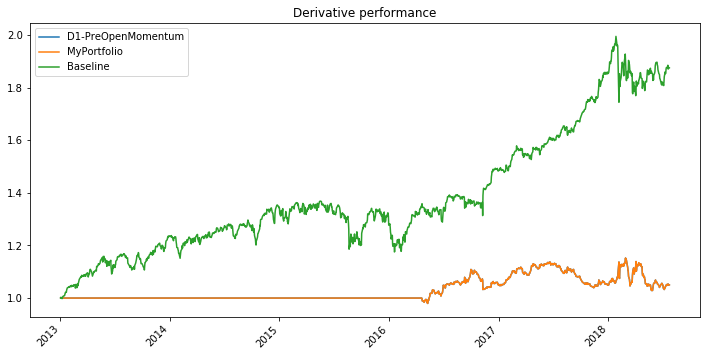

TradeFair_Portfolio                             DOW  \
                                      Capital                      Allocation   
                                         Open             Close           bar   
Date_Time                                                                       
2016-04-20 07:00:00-04:00    10000.0000000000   9994.3464307687 -0.5542714933   
2016-04-20 08:00:00-04:00     9994.2910662562   9994.5125218526 -0.5536389910   
2016-04-20 09:00:00-04:00     9994.4571555000   9986.4291233060 -0.5536573927   
2016-04-20 10:00:00-04:00     9986.5396770376   9986.5949551272 -0.5527808965   
2016-04-20 11:00:00-04:00     9987.1477421434   9969.6777385092 -0.5528482163   
...                                       ...               ...           ...   
2018-07-20 12:00:00-04:00    10485.0535763802  10487.5601634174 -0.4177645062   
2018-07-20 13:00:00-04:00    10487.3511812684  10491.5306576782 -0.4179476410   
2018-07-20 14:00:00-04:00    10491.7397981279  10495.7136250987 -0.4182975759   
2018-07-20 15:00:00-04:00    10495.5043178173  10502.8297804888 -0.4185978669   
2018-07-20 16:00:00-04:00    10502.2010065801  10502.2010065801  0.0000000000   

                                                                     
                                                Trade                
                                    gap           bar           gap  
Date_Time                                                            
2016-04-20 07:00:00-04:00 -0.5536451249 -0.5542714933  0.0006263683  
2016-04-20 08:00:00-04:00 -0.5536635269  0.0000061339 -0.0000245358  
2016-04-20 09:00:00-04:00 -0.5527686577  0.0000061342  0.0008887350  
2016-04-20 10:00:00-04:00 -0.5527870162 -0.0000122389 -0.0000061196  
2016-04-20 11:00:00-04:00 -0.5509174558 -0.0000612001  0.0019307605  
...                                 ...           ...           ...  
2018-07-20 12:00:00-04:00 -0.4179642979 -0.0000499300 -0.0001997917  
2018-07-20 13:00:00-04:00 -0.4182808993  0.0000166569 -0.0003332584  
2018-07-20 14:00:00-04:00 -0.4186145628 -0.0000166765 -0.0003169869  
2018-07-20 15:00:00-04:00 -0.4191826058  0.0000166958 -0.0005847389  
2018-07-20 16:00:00-04:00  0.0000000000  0.4191826058  0.0000000000  

[5434 rows x 6 columns]

Merton measure of Market Timing : 86.02% predictability
p1 + p2 : 1.011401365023489
p-value : 0.13979488002529267



Start date,2013-01-02
End date,2018-07-23
Total months,809
,Backtest
Annual return,0.1%
Cumulative returns,5.0%
Annual volatility,1.7%
Sharpe ratio,0.05
Calmar ratio,0.01
Stability,0.53
Max drawdown,-11.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.41,2018-02-28,2018-05-28,NaT,NaN
1,8.75,2017-06-29,2017-11-15,2018-02-26,173
2,7.43,2016-09-30,2016-11-10,2017-03-02,110
3,3.29,2017-03-16,2017-04-11,2017-04-20,26
4,2.79,2016-05-25,2016-06-24,2016-06-29,25


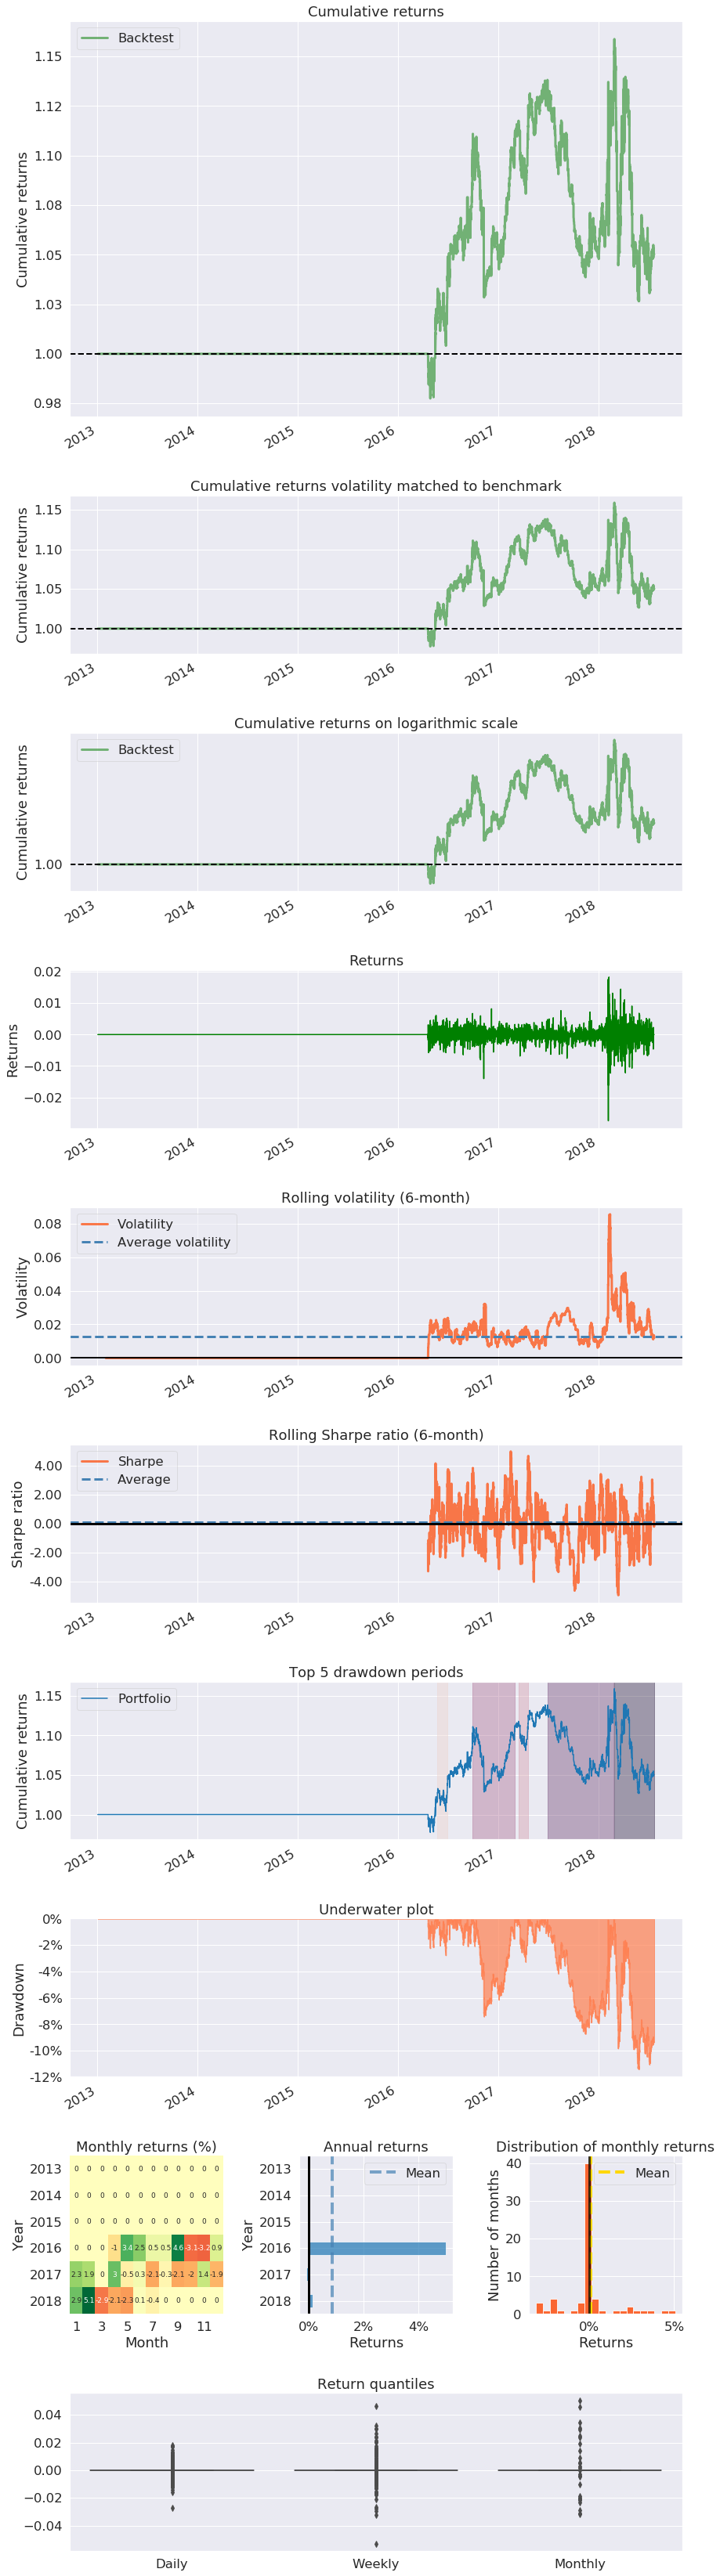

In [42]:
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.displaySummary(dInfo.assets[0], tInfo, baseline)

In [ ]:
import numpy as np 
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    result = result / max(result)
    return result

In [ ]:
a = dRet
#a -= np.mean(a)
a = autocorr(a)
a

In [ ]:
#dRet = dInfo.returns.Close + 1
dRet = trader.getPeriodReturns(dInfo.returns) + 1
#dRet = x.resample('B').agg('prod')
pnl = np.cumprod(dRet)

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(dRet-1, lags=50)
pyplot.show()

In [ ]:
#pyplot.plot(ac_win(dRet))
pyplot.plot(ac_win(dRet, lag=2))
pyplot.show()

In [ ]:
pyplot.plot(pnl.values)
pyplot.show()

In [ ]:
def ac_win(dRet, window=250, lag=1):
    ac = [0] * (window//2)
    for i in range(window, len(dRet)):
        sample = dRet[i-window:i]
        ac.append(autocorr(sample)[lag])
    return ac

In [ ]:

from matplotlib import pyplot
pyplot.plot(tInfo.values[:,0]/10000)
pyplot.show()

In [ ]:

from matplotlib import pyplot
x = np.diff(tInfo.values[:,0]/10000)
lags = 5
ma = np.convolve(x, np.ones((lags,))/lags, mode='same')
pyplot.plot(x,'ro')
pyplot.plot([0] * len(x))
pyplot.plot(ma)
pyplot.show()

In [ ]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
plot_pacf(np.diff(ma), lags=50)
pyplot.show()
adfuller(ma)

In [ ]:

from matplotlib import pyplot
pyplot.plot(np.diff(ma))
pyplot.show()